1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


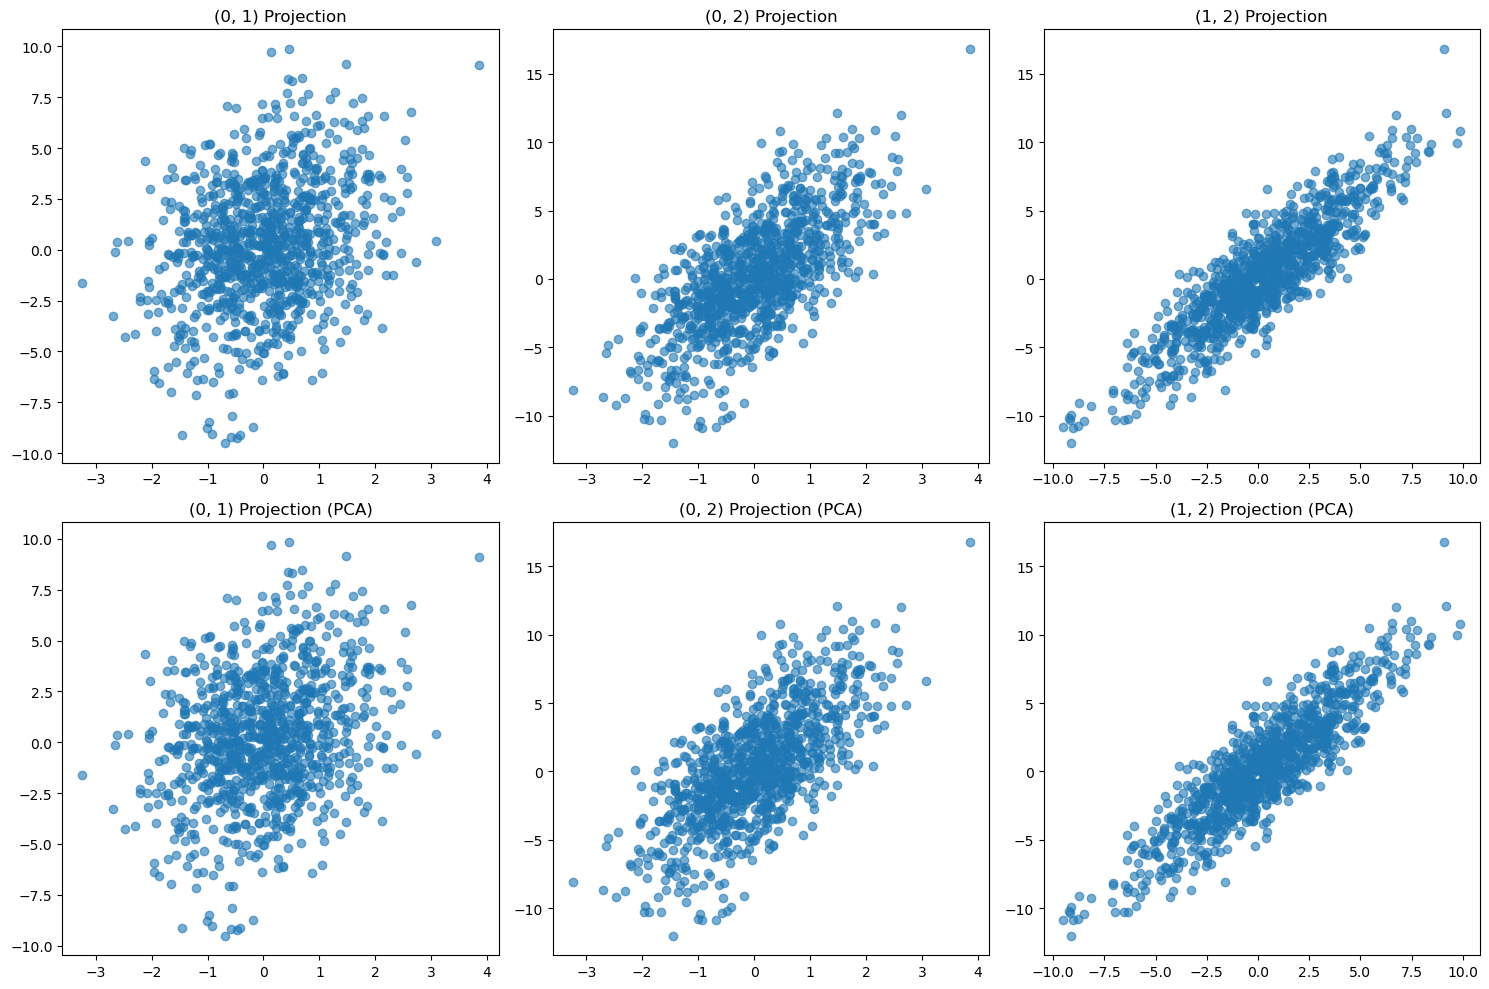

In [1]:
#1. Generate the dataset:
import numpy as np

np.random.seed(42)  # For reproducibility

N = 1000

# Generate random variables
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

# Create the 3D dataset
data = np.column_stack((x1, x2, x3))

#2. Find the eigenvectors and eigenvalues of the covariance matrix:

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#3. Find the eigenvectors and eigenvalues using SVD:

# Singular Value Decomposition
U, S, Vt = np.linalg.svd(data - np.mean(data, axis=0))

# The right singular vectors are the principal components
svd_eigenvectors = Vt.T

# Check if the results match
np.allclose(np.abs(eigenvectors), np.abs(svd_eigenvectors))

#4. Variability and Dimensionality Reduction:

# Calculate the percentage of total variability explained by each principal component
explained_var = eigenvalues / np.sum(eigenvalues)
cumulative_var = np.cumsum(explained_var)

# Find the number of components required to retain 99% of the variability
num_components_99 = np.argmax(cumulative_var >= 0.99) + 1

# Perform dimensionality reduction
reduced_data = np.dot(data, eigenvectors[:, :num_components_99])

#5. Redefine data in the basis yielded by PCA:

# Transform the original data using the selected principal components
reconstructed_data = np.dot(reduced_data, eigenvectors[:, :num_components_99].T)
#6. Plot the data points:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original data
axes[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.6)
axes[0, 0].set_title('(0, 1) Projection')

axes[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.6)
axes[0, 1].set_title('(0, 2) Projection')

axes[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.6)
axes[0, 2].set_title('(1, 2) Projection')

# Data in the new basis
axes[1, 0].scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], alpha=0.6)
axes[1, 0].set_title('(0, 1) Projection (PCA)')

axes[1, 1].scatter(reconstructed_data[:, 0], reconstructed_data[:, 2], alpha=0.6)
axes[1, 1].set_title('(0, 2) Projection (PCA)')

axes[1, 2].scatter(reconstructed_data[:, 1], reconstructed_data[:, 2], alpha=0.6)
axes[1, 2].set_title('(1, 2) Projection (PCA)')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

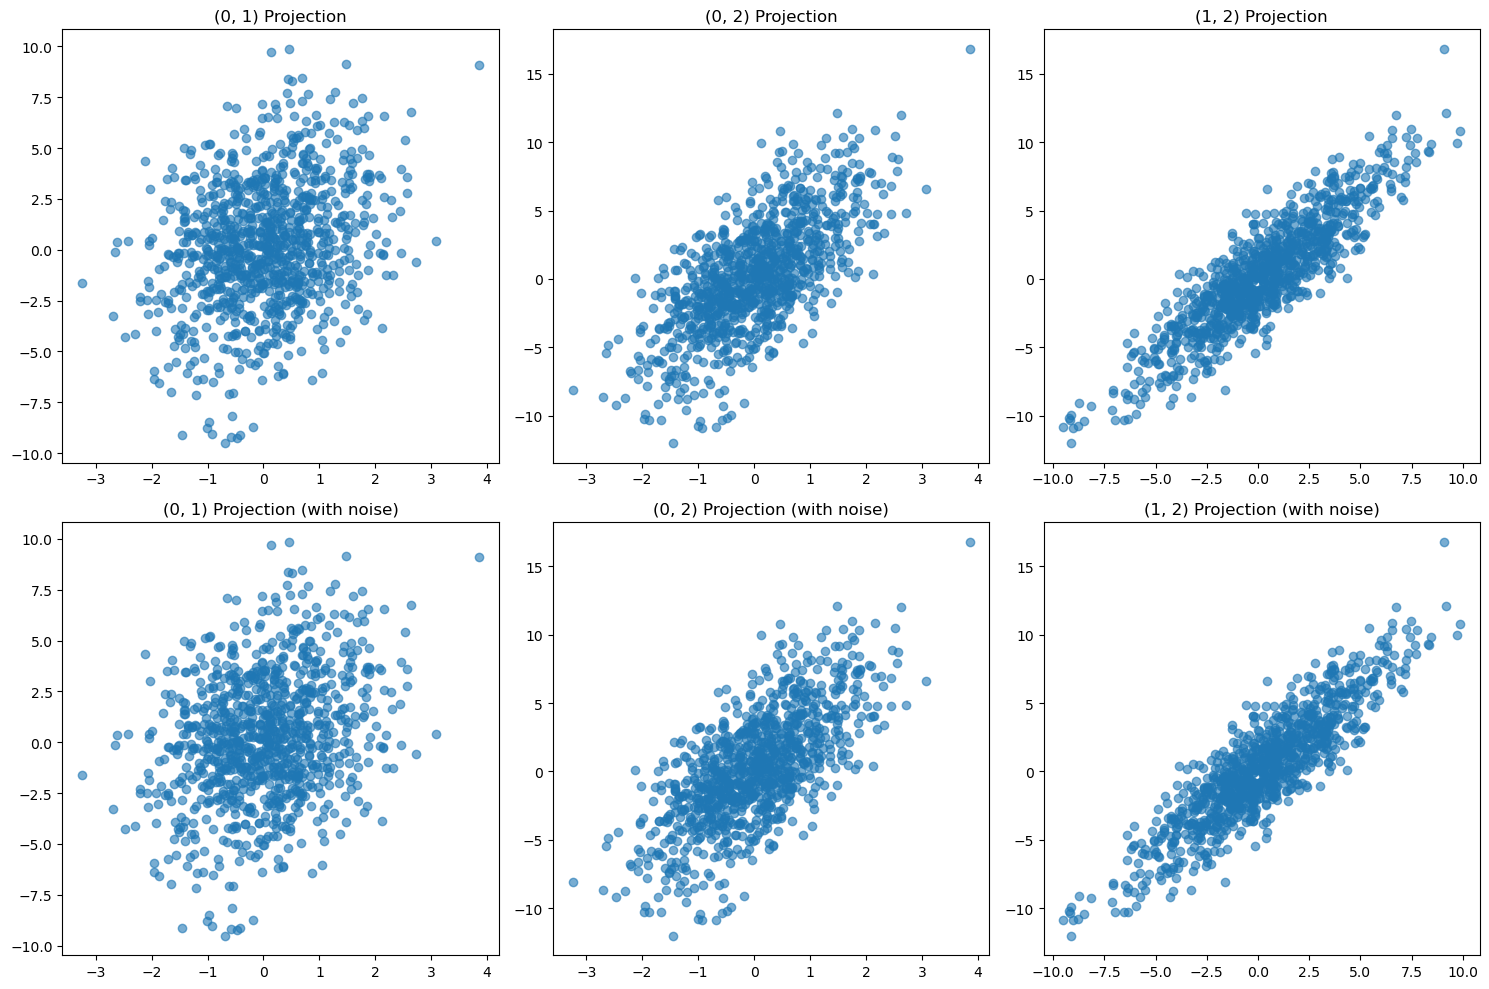

In [2]:
#1. Generate the dataset with uncorrelated noise:

# Generate uncorrelated random noise variables
noise_vars = np.random.normal(0, 1/50, size=(N, 10))

# Add noise to the original dataset
data_with_noise = np.column_stack((data, noise_vars))

#2. Perform PCA on the dataset with uncorrelated noise:

# Calculate the covariance matrix
cov_matrix_with_noise = np.cov(data_with_noise, rowvar=False)

# Find eigenvalues and eigenvectors
eigenvalues_with_noise, eigenvectors_with_noise = np.linalg.eig(cov_matrix_with_noise)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices_with_noise = np.argsort(eigenvalues_with_noise)[::-1]
eigenvalues_with_noise = eigenvalues_with_noise[sorted_indices_with_noise]
eigenvectors_with_noise = eigenvectors_with_noise[:, sorted_indices_with_noise]

#3. Compare the PCA results:

# Scatter plots for the original and new datasets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original data
axes[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.6)
axes[0, 0].set_title('(0, 1) Projection')

axes[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.6)
axes[0, 1].set_title('(0, 2) Projection')

axes[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.6)
axes[0, 2].set_title('(1, 2) Projection')

# Data with noise
axes[1, 0].scatter(data_with_noise[:, 0], data_with_noise[:, 1], alpha=0.6)
axes[1, 0].set_title('(0, 1) Projection (with noise)')

axes[1, 1].scatter(data_with_noise[:, 0], data_with_noise[:, 2], alpha=0.6)
axes[1, 1].set_title('(0, 2) Projection (with noise)')

axes[1, 2].scatter(data_with_noise[:, 1], data_with_noise[:, 2], alpha=0.6)
axes[1, 2].set_title('(1, 2) Projection (with noise)')

plt.tight_layout()
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 